# Final Exam - Machine Learning

**Student name**: Lucas Hix

You must submit the work via Blackboard. It is your responsibility to ensure that the correct file was sent.

If you needed to add extra files to this exam, make sure you are sending them as well.

The exam is individual and open book - you can consult your notes, the web, whatever you want, except asking others or AIs. Do your work ethically!

ChatGPT for theoretical questions is not allowed. Copilot for code is allowed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)

---

### Question 1: Practical part

We are going to work with the dataset "Labelled faces in the wild". A pre-processed version of it is already available in scikit-learn:

In [2]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape
print(f'{n_samples} images of size {h}x{w}')

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names

n_classes = target_names.shape[0]

print(f'\nn_classes: {n_classes}')
for class_name in target_names:
    print(class_name)


1288 images of size 50x37

n_classes: 7
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


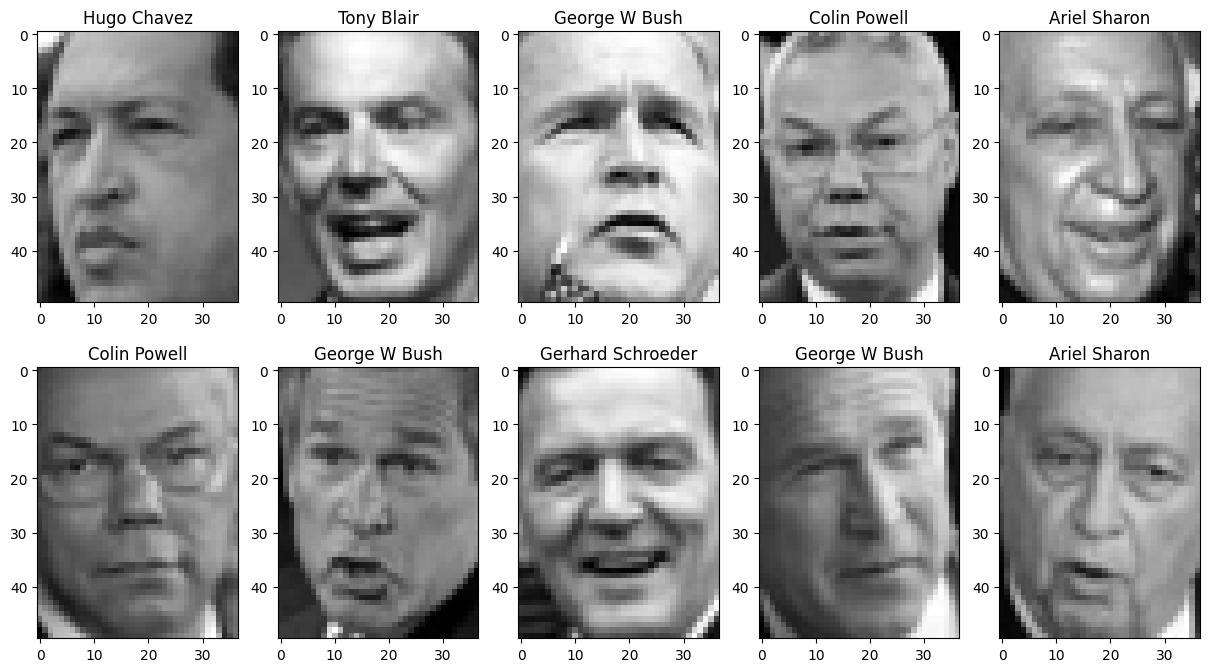

In [3]:
# A few figures.
plt.figure(figsize=(15, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(lfw_people.images[i], cmap=plt.cm.gray)
    plt.title(target_names[y[i]])

plt.show()

Instead of working with the images in their original format, we will work with only the pixel values independently (i.e. disregarding their spatial position):

In [4]:
X = lfw_people.data
n_features = X.shape[1]
print(f'We\'ll start with {n_features} features to describe each image')

We'll start with 1850 features to describe each image


In [5]:
X.shape, y.shape

((1288, 1850), (1288,))

Your task is to construct a model to classify the images. You will be graded on achieving the following marks:

- (1.0 pts) Pipeline for preprocessing and classifier model: organize your preprocessing steps AND your model in a single `Pipeline`.

- (1.0 pts) Dimensionality reduction: Instead of classifying the images based directly on the 1850 pixel values, you must perform a dimensionality reduction step first, using "Principal Component Analysis" (PCA) (`sklearn.decomposition.PCA`), which is basically the SVD of the data minus the mean. The PCA step must be part of the pipeline. Note that the number of components of the PCA is a hyperparameter that you must tune as well in the model selection phase.

- (1.0 pts) Model construction: You are required to use at least 2 different models for classification, and each one of them must be fine-tuned on some of their respective hyperparameters. Each model may have different requirements for preprocessing, pay attention! Also use (beyond the 2+ models mentioned above) the `DummyClassifier` to get a baseline classification.

- (1.0 pts) Model selection and hyperparameter fine-tuning: Use `GridSearchCV`

- (1.0 pts) Best model certification: retrain your best model with the training dataset and evaluate its performance on the test dataset

- (1.0 pts) Analysis: discuss the following points:

    - Is the accuracy adequate? How does it compare to the dummy classifier?
    - Is the model uniformly good, for all classes? Or do we have some classes where the model has worse performance?

- (1.0 pts) Deploy: do a final training of the best model on the whole dataset and use it to classify new images of faces. For instance, check which world leader is most similar to you! You will have to take care of formatting (manually) your new images to conform to the input of your model (50 rows by 37 columns, grayscale).

In [18]:
# Imports para as questões

from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [7]:
rng = np.random.default_rng(42)

random_state = rng.integers(0, 1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

print(f'random_state: {random_state}')

random_state: 89


In [ ]:
pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA()),
        ('classifier', DummyClassifier())
    ], 
    memory=mkdtemp()
)

pca__n_components = [10, 15, 25, 50, 100, 250]

In [9]:
# Dummy

param_grid = {
    'pca__n_components': pca__n_components,
    'classifier': [DummyClassifier()],
    'classifier__strategy': ['most_frequent', 'prior', 'stratified', 'uniform'] # constant não da fit
}

grid_search_dummy = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dummy.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(memory='C:\\Users\\lucas\\AppData\\Local\\Temp\\tmplan3wwvy',
                                steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier', DummyClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [DummyClassifier()],
                         'classifier__strategy': ['most_frequent', 'prior',
                                                  'stratified', 'uniform'],
                         'pca__n_components': [10, 15, 25, 50, 100, 250]},
             scoring='accuracy')

In [19]:
# Gradient Boosting

param_grid = {
    'pca__n_components': pca__n_components,
    'classifier': [GradientBoostingClassifier()],
    'classifier__n_estimators': [50, 100, 200, 500],
    'classifier__criterion': ['friedman_mse', 'squared_error'],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__max_features': ['sqrt', 'log2'],
}

grid_search_gradient_boosting = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gradient_boosting.fit(X_train, y_train)
#20m48.5s

GridSearchCV(cv=5,
             estimator=Pipeline(memory='C:\\Users\\lucas\\AppData\\Local\\Temp\\tmplan3wwvy',
                                steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier', DummyClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [GradientBoostingClassifier()],
                         'classifier__criterion': ['friedman_mse',
                                                   'squared_error'],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 5],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200, 500],
                         'pca__n_components': [10, 15, 25, 50, 100, 250]},
             scoring='accuracy')

In [12]:
# Random Forest

param_grid = {
    'pca__n_components': pca__n_components,
    'classifier': [RandomForestClassifier()],
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'classifier__n_estimators': [50, 100, 200, 500],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__max_features': ['sqrt', 'log2'],
}
grid_search_random_forest = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_random_forest.fit(X_train, y_train)
# 10m31.2s

GridSearchCV(cv=5,
             estimator=Pipeline(memory='C:\\Users\\lucas\\AppData\\Local\\Temp\\tmplan3wwvy',
                                steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier', DummyClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [RandomForestClassifier()],
                         'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 5],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200, 500],
                         'pca__n_components': [10, 15, 25, 50, 100, 250]},
             scoring='accuracy')

In [22]:
# Identificando o melhor modelo

dummy_score = grid_search_dummy.best_score_
print(f"Score do DummyClassifier: {dummy_score}")
print("")

random_forest_score = grid_search_random_forest.best_score_
print(f"Score do RandomForestClassifier: {random_forest_score}")
print("")

gradient_boosting_score = grid_search_gradient_boosting.best_score_
print(f"Score do GradientBoostingClassifier: {gradient_boosting_score}")
print("")

best_model = None

if dummy_score >= random_forest_score and dummy_score >= gradient_boosting_score:
    print(f"DummyClassifier foi o melhor modelo com pontuação de: {dummy_score}")
    best_model = grid_search_dummy.best_estimator_

elif random_forest_score >= gradient_boosting_score:
    print(f"RandomForestClassifier foi o melhor modelo com pontuação de: {random_forest_score}")
    best_model = grid_search_random_forest.best_estimator_

else:
    print(f"GradientBoostingClassifier foi o melhor modelo com pontuação de: {gradient_boosting_score}")
    best_model = grid_search_gradient_boosting.best_estimator_

Score do DummyClassifier: 0.41615298328080763

Score do RandomForestClassifier: 0.6531755782276588

Score do GradientBoostingClassifier: 0.7753912718337697

GradientBoostingClassifier foi o melhor modelo com pontuação de: 0.7753912718337697


In [23]:
# Validação do melhor modelo

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Relatório de classificação:")
print(classification_report(y_test, y_pred))
print("")
print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.88      0.41      0.56        17
           1       0.75      0.68      0.72        63
           2       0.83      0.51      0.63        37
           3       0.69      0.95      0.80       128
           4       0.87      0.48      0.62        27
           5       0.79      0.50      0.61        22
           6       0.70      0.75      0.72        28

    accuracy                           0.73       322
   macro avg       0.79      0.61      0.67       322
weighted avg       0.75      0.73      0.72       322


Acurácia no conjunto de teste: 0.7298136645962733


Analysis: discuss the following points:
- Is the accuracy adequate? How does it compare to the dummy classifier?
- Is the model uniformly good, for all classes? Or do we have some classes where the model has worse performance?

O modelo GradientBoosting obteve uma acurácia de 72,98% no conjunto de teste, enquanto o DummyClassifier apresentou um de 41,62%. Isso demonstra que o modelo é 30% mais eficaz que o classificador base, o desempenho do GradientBoosting evidencia que ele consegue aprender padrões significativos nos dados. Isso reforça sua capacidade de realizar previsões úteis, embora ainda existam classes em que o desempenho pode ser melhorado. Como visto no classification_report o modelo não é uniforme nas classes, na classe 0 a acurácia foi de 88% porém o recall foi de 41%, basicamente a metade não conseguindo identificar todos os casos dessa classe, o oposto aconteceu na classe 3 onde a acurácia foi de 69% mais o recall foi de 95% o que significa que o modelo consegui indentificar quase todos os casos dessa classe.

In [24]:
# Teste final com o melhor modelo
best_model.fit(X, y)

y_pred = best_model.predict(X)

---

### Question 2: Theoretical part (3.0 pts)

For each statement below, choose a position: "in favor" or "against". Construct an argument to justify your position. Your argumentation must have at least 3 complementary arguments, and it cannot be made up of simple statements only, but must include an explanation of the statements.

Rubric:

- (+0.25 pts) for a valid argument, (-0.25 pts) for an invalid argument, maximum of (0.75 pts) and minimum of (0.0 pts)
- (+0.15 pts) for coherence of arguments and correct use of citations.
- (+0.1 pts) for quality of writing.

a) (1.0 pt) "Artificial intelligence will be beneficial for all people in the world, it will generate prosperity for everyone, reduce inequalities. It will also reduce injustices, as it is impartial".

Against: 

Afirmar que a inteligência artificial é vantajosa para todas as pessoas do mundo por ser imparcial e reduzir desigualdades é uma afirmação que não leva em conta o desenvolvimento da rede neural. As IAs sempre terão parcialidade, uma vez que não é possivel colletar e ter dados totalmente imparciais o que faz que durante o seu treinamento a IA se torne parcial. Além disso o acesso a essa ferramenta não é garantido uma vez que é existem modelos privados que tem acesso restrito e outros sendo necessario pagar para poder ultilziar-los limitando o uso destas ferramenteas a pessoas com alto poder aquisitivo. Por fim existem IAs sendo desenvolvidas que não procuram gerar a prosperidade para todo mundo como no caso de IAs criadas por militares para matar outros humanos.

b) (1.0 pt) "In a bagging ensemble model, we are benefiting from the wisdom of the crowds effect. The success of these models serves as a mathematical model that justifies the effectiveness and fairness of democracy as a political system."

Against: 

O sucesso dos modelos, que se baseiam no efeito da "sabedoria das multidões", destaca o poder da tomada de decisão coletiva.
Porém para que a "sabedoria das multidões" funcione é necessario que o alvo a ser procurado seja bem estrurado, ou seja um objetivo claro, e que a pesquisa, o treinamento, seja todalmente idependete e que cada valor adiciona tenha o mesmo peso no resultado dos valores anteriores adicionados. Por exemplo perguntar a pessoas de forma aleatoria a quantidade de doces dentro de uma jarra, o que seria um objetivo claro sem viés ou dependecia, e sem adicionar nenhum comentario sobre quais os valores ja registrados por outras pessoas, o que seria a aquisição de dados totalmente idependetes, e assegurando que todas as respostas tenham o mesmo peso garante que o efeito da "sabedoria das multidões" funcione. Porém em um sistema politico todos esses 3 fatores não são verdadeiros, a decisão a ser tomada muitas vezes não é objetiva, não possuindo respota correta o que por sua vez deixa de ser um objetivo claro e estruturado. Além disso a votação de um caditato não é idependete, no periodo de eleição existe inumeras estrategias para influenciar o eleitorado, tanto que existe a ciencia politica para tal tarefa, e em relação ao peso de cada cidadão que vota o peso não é igual para todos, em teoria sim mais na pratica existe sempre o favorecimento de uma cada da sociedade em detrimento de outra.

c) (1.0 pt) "All classical Machine Learning has been superseded by Neural Networks and Deep Learning."

Against: 

A afirmação de que "todo o aprendizado de máquina clássico foi superado por redes neurais e aprendizado profundo" é uma simplificação da realidade, tendo em vista que nem todas as soluções necessitam de Deep Learning ou IAs sem si e para gerar uma IA capaz de ser melhor que um algoritmico classico bem programado muitas vezes é necessario uma quandidade tão grande de dados que nem existem o que causa um overfitting. Além disso, métodos clássicos são mais interpretáveis, permitindo que especialistas compreendam e expliquem os resultados, uma vantagem crucial em áreas regulamentadas como segurança, saúde e finanças, onde normalmente não existe dados sem vieses ou a maioria das situações não existe uma resposta garantidademnte correta e aceita pelo sociedade. Por fim, técnicas clássicas frequentemente demandam menos poder computacional e podem ser implementadas de forma mais rápida e barata, tornando-as ideais para aplicações com recursos limitados.